Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

<ipython-input-1-abb2efd81dd5>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_revenue, x='Region', y='TotalValue', palette='viridis')


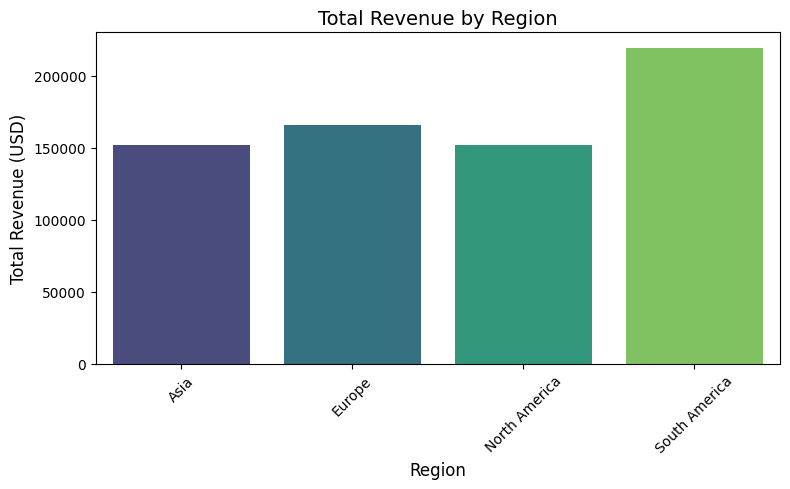

<ipython-input-1-abb2efd81dd5>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='TotalValue', y='ProductName', palette='coolwarm')


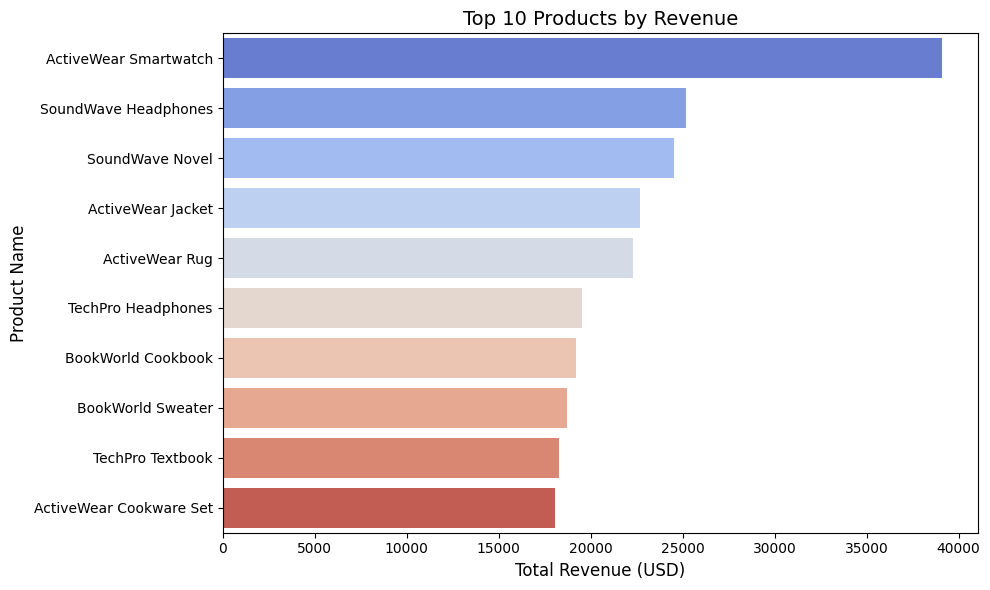

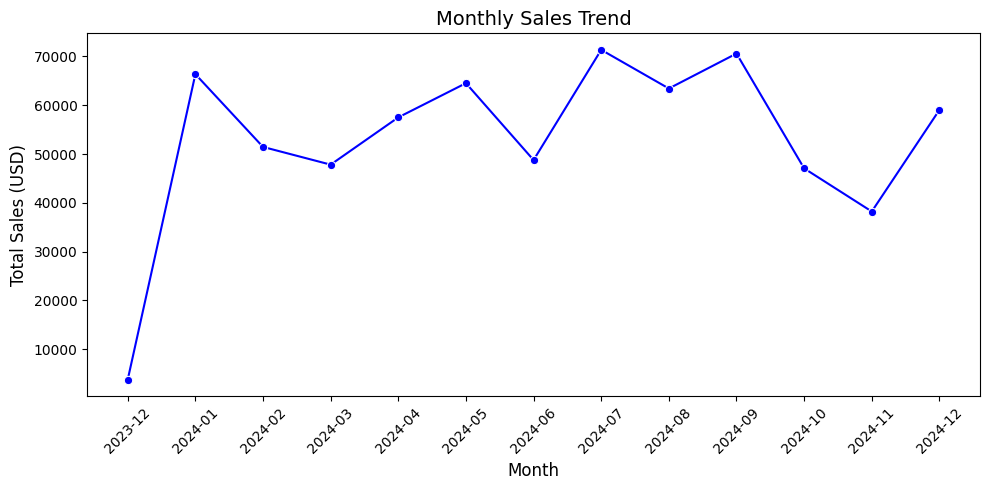

<ipython-input-1-abb2efd81dd5>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_customers, x='Region', y='Customer Count', palette='pastel')


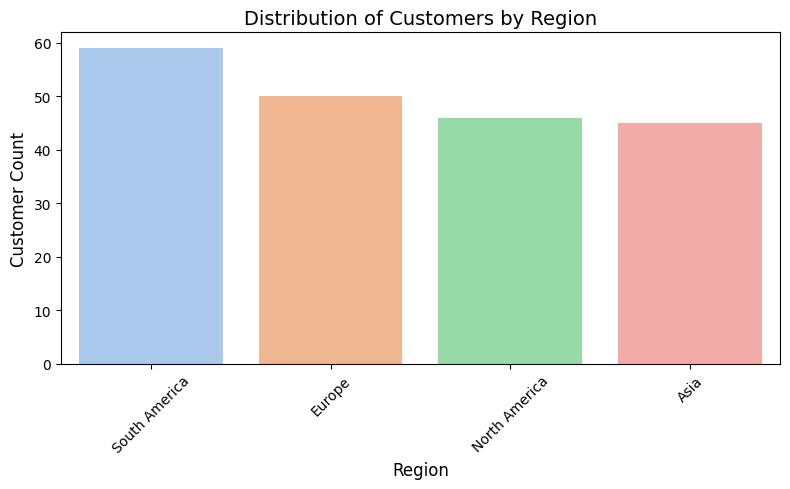

<ipython-input-1-abb2efd81dd5>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Category', y='Quantity', palette='flare')


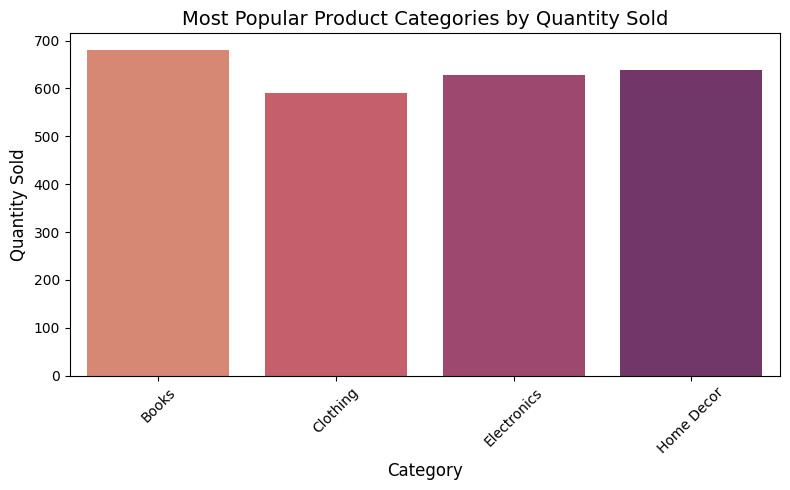

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Initial Exploration
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

# Data Cleaning
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Display merged data structure
print("\nMerged Dataset Info:")
print(merged_data.info())
print(merged_data.head())

# Summary Statistics
print("\nSummary Statistics:")
print(merged_data.describe())

# ---- Visualization Section ----

# 1. Total Revenue by Region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=region_revenue, x='Region', y='TotalValue', palette='viridis')
plt.title('Total Revenue by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Top 10 Products by Revenue
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='TotalValue', y='ProductName', palette='coolwarm')
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Total Revenue (USD)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

# 3. Monthly Sales Trend
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue', marker='o', color='b')
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Distribution of Customers by Region
region_customers = customers['Region'].value_counts().reset_index()
region_customers.columns = ['Region', 'Customer Count']
plt.figure(figsize=(8, 5))
sns.barplot(data=region_customers, x='Region', y='Customer Count', palette='pastel')
plt.title('Distribution of Customers by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Popular Product Categories
category_sales = merged_data.groupby('Category')['Quantity'].sum().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=category_sales, x='Category', y='Quantity', palette='flare')
plt.title('Most Popular Product Categories by Quantity Sold', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


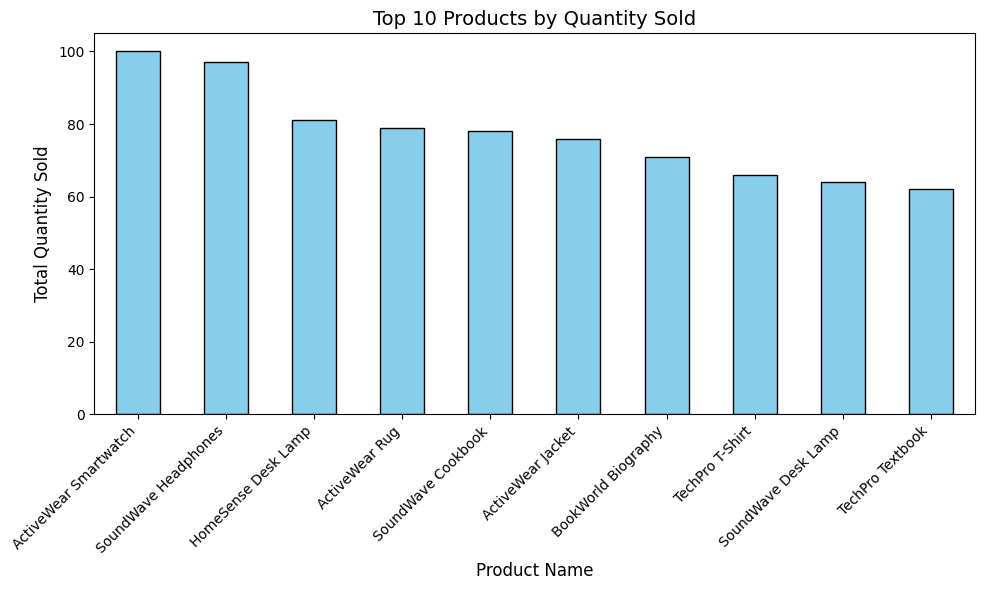

In [3]:
# Top products by total quantity sold
top_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10) # Changed 'df' to 'merged_data' as it likely contains the required columns

# Plot
plt.figure(figsize=(10, 6))
top_products.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Products by Quantity Sold", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Quantity Sold", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.tight_layout()
plt.show()

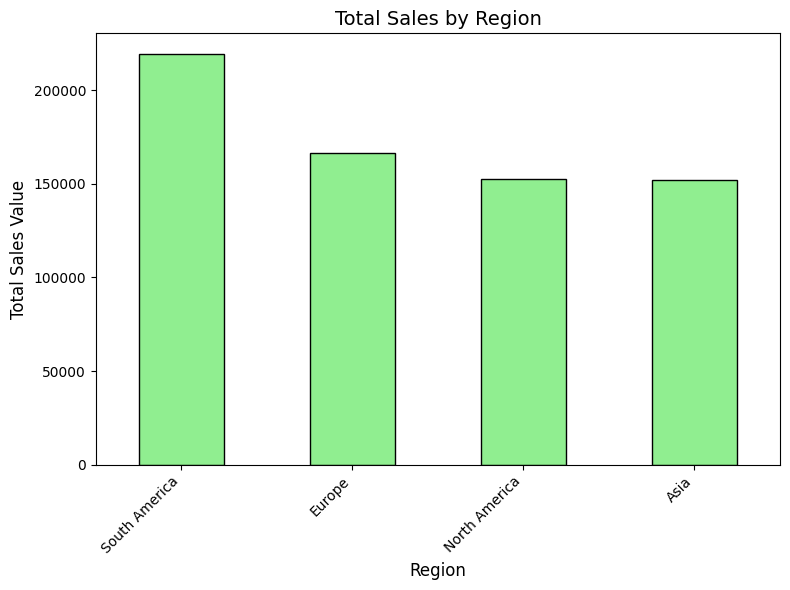

In [5]:
# Total sales by region
sales_by_region = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False) # Changed 'df' to 'merged_data' as it likely contains the required columns

# Plot
plt.figure(figsize=(8, 6))
sales_by_region.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Total Sales by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales Value", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.tight_layout()
plt.show()

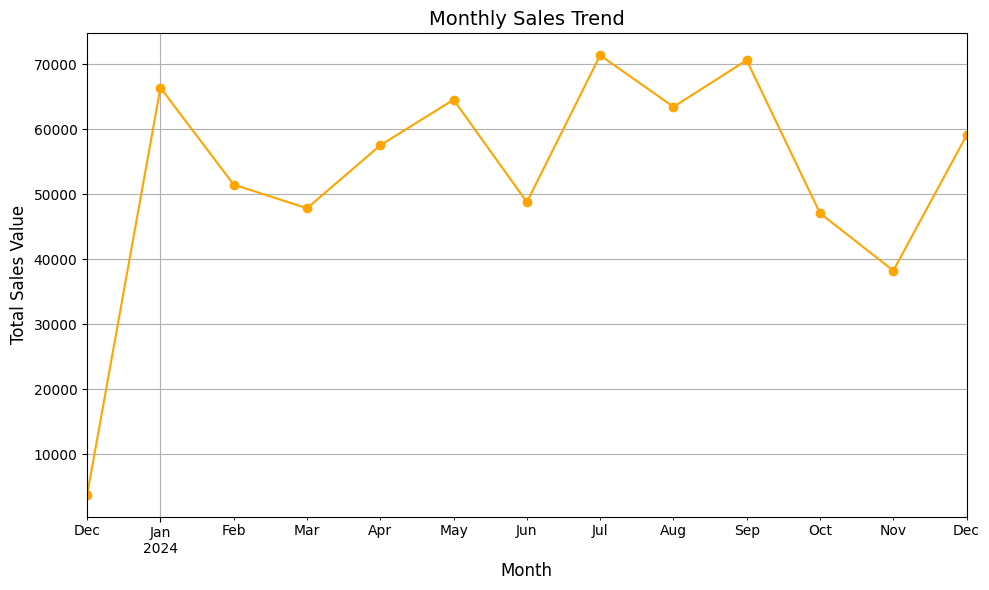

In [7]:
# Extract month from the TransactionDate
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.to_period("M") # Changed 'df' to 'merged_data'
monthly_sales = merged_data.groupby("TransactionMonth")["TotalValue"].sum()

# Plot
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind="line", marker="o", color="orange", linestyle="-")
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales Value", fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

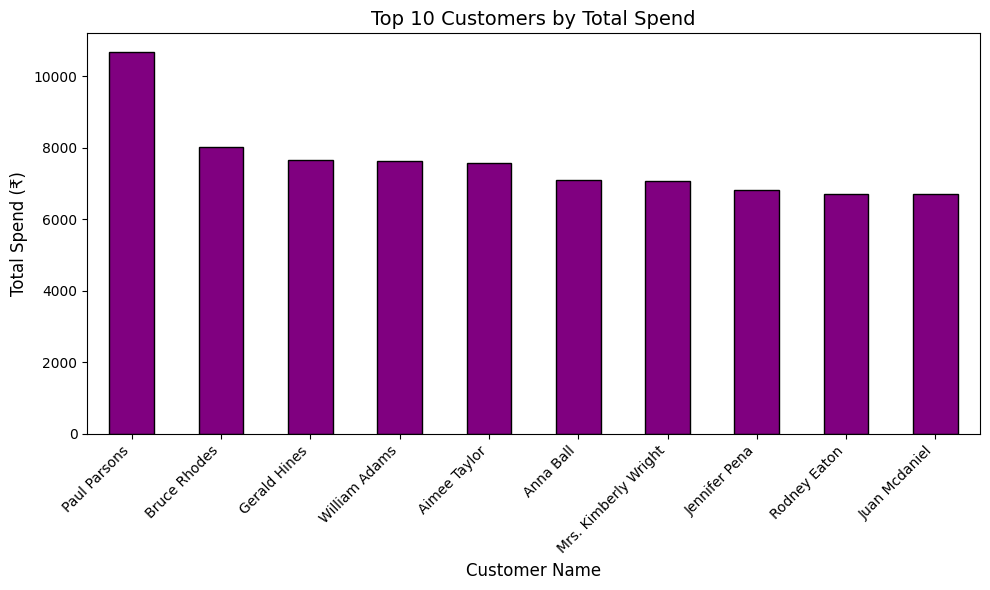

In [10]:
# Top 10 customers by total spending
# Changed 'customers' to 'merged_data' to access 'TotalValue' column
top_customers = merged_data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
top_customers.plot(kind="bar", color="purple", edgecolor="black")
plt.title("Top 10 Customers by Total Spend", fontsize=14)
plt.xlabel("Customer Name", fontsize=12)
plt.ylabel("Total Spend (₹)", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha="right")
plt.tight_layout()
plt.show()

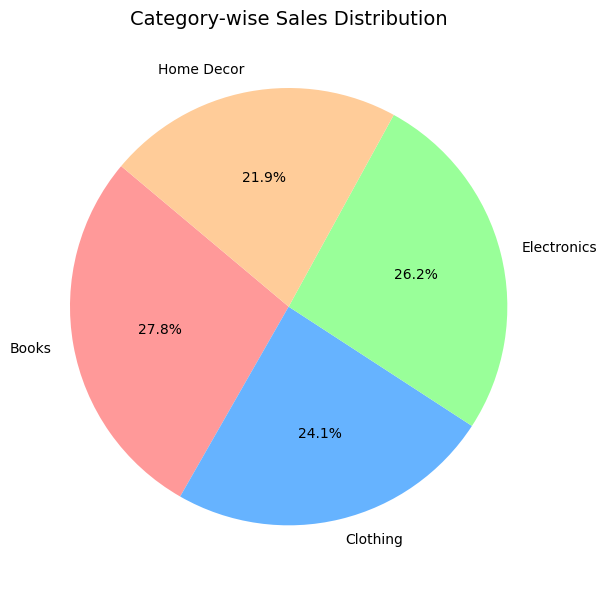

In [12]:
# Total sales by product category
category_sales = merged_data.groupby("Category")["TotalValue"].sum() # Changed 'df' to 'merged_data' to use the correct DataFrame

# Plot
plt.figure(figsize=(8, 6))
category_sales.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["#ff9999","#66b3ff","#99ff99","#ffcc99"])
plt.title("Category-wise Sales Distribution", fontsize=14)
plt.ylabel("")  # Remove the y-axis label
plt.tight_layout()
plt.show()